# COVID risk mapping tutorial.

On 14th February, 2020, Africa confirmed its first case of COVID 19 on the continent with the first case being reported in Egypt. Rapidly, cases of COVID 19 spread throughout the contintent and as of the end of May, all the countries in Africa have confirmed cases of COVID 19. Even so, it is widely beleived that there is widespread underreporting due to limited testing capacity on the continent that is also beleagured by underdeveloped healthcare sytems.

The World Health Organization (WHO) estimates that within the first year, 250,000 Africans will have been infected and deaths from the disease will range from 150,000 - 190,000 individuals. As of now, the trajectory of COVID 19 on the continent is still not clear and there is a variety of opinions on what impact the disease will have on Africa.

The intention of this piece is to utilise existing information on the disease to help analysts in Africa map out the spread and impact of the disease in their own countries using census data, by using Kenya as a case study. This tutorial will use the python programming language for data processing and presentation. Of course, some background in python will be required to enable users follow through and replicate the same.

## Part 1 reading and cleaning data from Excel file

The data used for this analysis is from the Kenya Population and Housing Census of 2019. This data is presented in pdf format on the KNBS site and some preprocessing was done to the data to convert it to and Excel file for use in this tutorial. It is hoped that users of this tutorial will readily have age data available for their respective countries.

Python has a very useful library for reading and manupilating data called pandas. You can learn more about it from the documentation here, https://pandas.pydata.org/docs/ and a useful tutorial video from codebasics https://www.youtube.com/watch?v=CmorAWRsCAw&list=PLeo1K3hjS3uuASpe-1LjfG5f14Bnozjwy.

To install the library, remove the # in (#!pip install pandas). Skip to ln[2] if you have the library intalled to import the module to your current work environment.

In [1]:
#!pip install pandas

In [2]:
# call up the pandas package
import pandas as pd

**Read age pyramid data from file on your PC into a Pandas DataFrame**

Pandas can parse through various formats to create dataframes, check documentation above for some of these. The most common one is csv and xls/x.
Our data is captured in and Excel workbook and we are going to read it into a dataframe named df_age.

In [3]:
df_age = pd.read_excel("Copy of AGE_INDICATORS_FINAL_v3 (00000003).xlsx")

View a nice summary of your data with the following lines of code, the first will print out for you a short discritptoin of the first few lines of the dataframe. The second lets you view the number of total rows and columns in the data and the third lets you view type of values the dataframe has.

In [4]:
print (df_age.head()) # to view in brief data contained in the dataframe
print (df_age.shape) # to view number of columns and rows the dataframe has
print(df_age.dtypes) # to view they type of data captured within the dataframe

    COUNTY SUB COUNTY Age  Male Female Total
0  MOMBASA  CHANGAMWE   0  1584   1595  3179
1  MOMBASA  CHANGAMWE   1  1510   1447  2957
2  MOMBASA  CHANGAMWE   2  1557   1539  3096
3  MOMBASA  CHANGAMWE   3  1482   1416  2898
4  MOMBASA  CHANGAMWE   4  1355   1290  2645
(41361, 6)
COUNTY        object
SUB COUNTY    object
Age           object
Male          object
Female        object
Total         object
dtype: object


Now we can begein identifying what needs to be done to the dataframe to clean it and use it for analysis. The **Age**, **Male**, **Female** and **Total** columns contain numeric charachers but the DataFrame lists these are objects, meaning you cannot carry out the numeric functions we need to perform on the data. Additionally, expanding the DataFrame to view 15 rows of data highlights further issues to be addressed. We have no use for age group data in row six (0-4 year age group) and the mistranslated (5-9) age group that has been captured as a datetime value. 

In [5]:
# View the first 15 rows of your data
df_age.head(15)

,COUNTY,SUB COUNTY,Age,Male,Female,Total
0,MOMBASA,CHANGAMWE,0,1584,1595,3179
1,MOMBASA,CHANGAMWE,1,1510,1447,2957
2,MOMBASA,CHANGAMWE,2,1557,1539,3096
3,MOMBASA,CHANGAMWE,3,1482,1416,2898
4,MOMBASA,CHANGAMWE,4,1355,1290,2645
5,MOMBASA,CHANGAMWE,0 - 4,7488,7287,14775
6,MOMBASA,CHANGAMWE,5,1369,1419,2788
7,MOMBASA,CHANGAMWE,6,1363,1390,2753
8,MOMBASA,CHANGAMWE,7,1341,1342,2683
9,MOMBASA,CHANGAMWE,8,1240,1202,2442


### Cleaning
For ease of calculations, we are going to convert the **Age**, **Male**, **Female** and **Total** columns from str to int. But first, we will drop any row that has a missing value/s and remove data that we don't need for the analysis.

In [6]:
# Drop any row with missing values
df_age = df_age.dropna()

Second task is to identify all unique values in the Age column by first parsing the data into an array with all the unique values.

In [7]:
df_age.loc[:, "Age"].unique()

array([0, 1, 2, 3, 4, '0 - 4', 5, 6, 7, 8, 9,
       datetime.datetime(2020, 9, 5, 0, 0), 10, 11, 12, 13, 14,
       datetime.datetime(2014, 10, 1, 0, 0), 15, 16, 17, 18, 19, '15-19',
       20, 21, 22, 23, 24, '20-24', 25, 26, 27, 28, 29, '25-29', 30, 31,
       32, 33, 34, '30-34', 35, 36, 37, 38, 39, '35-39', 40, 41, 42, 43,
       44, '40-44', 45, 46, 47, 48, 49, '45-49', 50, 51, 52, 53, 54,
       '50-54', 55, 56, 57, 58, 59, '55-59', 60, 61, 62, 63, 64, '60-64',
       65, 66, 67, 68, 69, '65-69', 70, 71, 72, 73, 74, '70-74', 75, 76,
       77, 78, 79, '75-79', 80, 81, 82, 83, 84, '80-84', 85, 86, 87, 88,
       89, '85-89', 90, 91, 92, 93, 94, '90-94', 95, 96, 97, 98, 99,
       '95-99', '100+', 'Not Stated', 'Age', 'Total'], dtype=object)

**Drop age set values, 'Not Stated', datetime values, replace 100+ with 100 and remove any other string values not required**

In [8]:
# Drop age sets and not stated 
df_age = df_age[~df_age['Age'].isin(['0 - 4', '15-19',  '20-24', '25-29',  '30-34',  '35-39',  '40-44', '45-49', '50-54',\
                                     '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90-94', '95-99','Age',\
                                     'Not Stated', 'Total'])]
# Drop datetime values
df_age = df_age[~df_age['Age'].isin([pd.Timestamp('2020-09-05 00:00:00'), pd.Timestamp('2014-10-01 00:00:00')])]

# Replace 100+ with 100
df_age = df_age.replace(to_replace ="100+", value ="100")

# Remove "-" string value
df_age = df_age[~df_age['Total'].isin(['-'])]
df_age = df_age[~df_age['Male'].isin(['-'])]
df_age = df_age[~df_age['Female'].isin(['-'])]
df_age = df_age[~df_age['Age'].isin(['-'])]

To convert the required fields into integer format, the code below applies, 

In [9]:
df_age[['Age', 'Male', 'Female', 'Total']] = df_age[['Age', 'Male', 'Female', 'Total']].apply(pd.to_numeric)

In [10]:
# Check if you have made the conversion successfully
df_age.dtypes

COUNTY        object
SUB COUNTY    object
Age            int64
Male           int64
Female         int64
Total          int64
dtype: object

**Check whether the sum of Male and Female columns is equal to the Totals column**

In [11]:
bool(df_age.Male.sum() + df_age.Female.sum() == df_age.Total.sum())

True

Our dataframe is now ready for infection and mortality calculations

### Part 2 Calculating infections and mortality

The US CDC has been publishing weekly survellance data on COVID-19 cases for since March. For the purposes of this tutorial, we will be using data on test results from commercial labs as shared by US CDC as of May.https://www.cdc.gov/coronavirus/2019-ncov/covid-data/covidview/05292020/commercial-labs.html
<table class="table table-condensed ">
<caption class="text-center caption-top h4">U.S. Commercial Laboratories Reporting to CDC<br>
March 29, 2020 – May 23, 2020<br>
Data as of May 28, 2020</caption>
<thead class="table-active bg-quaternary">
<tr>
<th id="week" class="text-center" rowspan="2" scope="col">Week</th>
<th id="#labs" class="text-center" rowspan="2" scope="col">No. of Labs</th>
<th id="total" class="text-center" colspan="3" scope="col">Total (includes age unknown)</th>
<th id="0-4" class="text-center" colspan="3" scope="col">0-4 years</th>
<th id="5-17" class="text-center" colspan="3" scope="col">5-17 years</th>
<th id="18-49" class="text-center" colspan="3" scope="col">18-49 years</th>
<th id="50-64" class="text-center" colspan="3" scope="col">50-64 years</th>
<th id="65" class="text-center" colspan="3" scope="col">65+ years</th>
</tr>
<tr>
<th id="total-spec" class="text-center" scope="col">Spec Tested</th>
<th id="total-#pos" class="text-center" scope="col"># Pos</th>
<th id=" total, total-%pos" class="text-center" scope="col">% Pos</th>
<th id="0-4-spec" class="text-center" scope="col">Spec Tested</th>
<th id="0-4-#pos" class="text-center" scope="col"># Pos</th>
<th id="0-4-%pos" class="text-center" scope="col">% Pos</th>
<th id="5-17-spec" class="text-center" scope="col">Spec Tested</th>
<th id="5-17-#pos" class="text-center" scope="col"># Pos</th>
<th id="5-17-%pos" class="text-center" scope="col">% Pos</th>
<th id="18-49-spec" class="text-center" scope="col">Spec Tested</th>
<th id="18-49-#pos" class="text-center" scope="col"># Pos</th>
<th id="18-49-%pos" class="text-center" scope="col">% Pos</th>
<th id="50-64-spec" class="text-center" scope="col">Spec Tested</th>
<th id="50-64-#pos" class="text-center" scope="col"># Pos</th>
<th id="50-64-%pos" class="text-center" scope="col">% Pos</th>
<th id="65-spec" class="text-center" scope="col">Spec Tested</th>
<th id="65-#pos" class="text-center" scope="col"># Pos</th>
<th id="65-%pos" class="text-center" scope="col">% Pos</th>
</tr>
</thead>
<tbody>
<tr>
<td>202014</td>
<td class="text-center">6</td>
<td class="text-center">541,667</td>
<td class="text-center">125,160</td>
<td class="text-center">23.1</td>
<td class="text-center">8,305</td>
<td class="text-center">529</td>
<td class="text-center">6.4</td>
<td class="text-center">13,497</td>
<td class="text-center">1,863</td>
<td class="text-center">13.8</td>
<td class="text-center">288,959</td>
<td class="text-center">61,059</td>
<td class="text-center">21.1</td>
<td class="text-center">130,196</td>
<td class="text-center">35,073</td>
<td class="text-center">26.9</td>
<td class="text-center">75,862</td>
<td class="text-center">20,989</td>
<td class="text-center">27.7</td>
</tr>
<tr>
<td>202015</td>
<td class="text-center">6</td>
<td class="text-center">501,826</td>
<td class="text-center">114,377</td>
<td class="text-center">22.8</td>
<td class="text-center">6,754</td>
<td class="text-center">600</td>
<td class="text-center">8.9</td>
<td class="text-center">12,893</td>
<td class="text-center">2,152</td>
<td class="text-center">16.7</td>
<td class="text-center">258,755</td>
<td class="text-center">55,320</td>
<td class="text-center">21.4</td>
<td class="text-center">124,360</td>
<td class="text-center">31,669</td>
<td class="text-center">25.5</td>
<td class="text-center">73,229</td>
<td class="text-center">19,212</td>
<td class="text-center">26.2</td>
</tr>
<tr>
<td>202016</td>
<td class="text-center">6</td>
<td class="text-center">508,254</td>
<td class="text-center">98,640</td>
<td class="text-center">19.4</td>
<td class="text-center">6,372</td>
<td class="text-center">579</td>
<td class="text-center">9.1</td>
<td class="text-center">15,123</td>
<td class="text-center">2,356</td>
<td class="text-center">15.6</td>
<td class="text-center">242,390</td>
<td class="text-center">46,158</td>
<td class="text-center">19.0</td>
<td class="text-center">122,464</td>
<td class="text-center">24,888</td>
<td class="text-center">20.3</td>
<td class="text-center">78,911</td>
<td class="text-center">16,145</td>
<td class="text-center">20.5</td>
</tr>
<tr>
<td>202017</td>
<td class="text-center">6</td>
<td class="text-center">614,815</td>
<td class="text-center">97,415</td>
<td class="text-center">15.8</td>
<td class="text-center">7,747</td>
<td class="text-center">685</td>
<td class="text-center">8.8</td>
<td class="text-center">19,703</td>
<td class="text-center">2,986</td>
<td class="text-center">15.2</td>
<td class="text-center">295,693</td>
<td class="text-center">48,598</td>
<td class="text-center">16.4</td>
<td class="text-center">152,201</td>
<td class="text-center">24,040</td>
<td class="text-center">15.8</td>
<td class="text-center">110,022</td>
<td class="text-center">16,789</td>
<td class="text-center">15.3</td>
</tr>
<tr>
<td>202018</td>
<td class="text-center">6</td>
<td class="text-center">741,810</td>
<td class="text-center">96,005</td>
<td class="text-center">12.9</td>
<td class="text-center">9,832</td>
<td class="text-center">832</td>
<td class="text-center">8.5</td>
<td class="text-center">24,565</td>
<td class="text-center">3,617</td>
<td class="text-center">14.7</td>
<td class="text-center">351,973</td>
<td class="text-center">49,151</td>
<td class="text-center">14.0</td>
<td class="text-center">181,355</td>
<td class="text-center">22,262</td>
<td class="text-center">12.3</td>
<td class="text-center">137,715</td>
<td class="text-center">15,934</td>
<td class="text-center">11.6</td>
</tr>
<tr>
<td>202019</td>
<td class="text-center">6</td>
<td class="text-center">877,058</td>
<td class="text-center">86,441</td>
<td class="text-center">9.9</td>
<td class="text-center">12,120</td>
<td class="text-center">949</td>
<td class="text-center">7.8</td>
<td class="text-center">30,116</td>
<td class="text-center">3,843</td>
<td class="text-center">12.8</td>
<td class="text-center">400,295</td>
<td class="text-center">44,633</td>
<td class="text-center">11.2</td>
<td class="text-center">211,430</td>
<td class="text-center">18,798</td>
<td class="text-center">8.9</td>
<td class="text-center">174,253</td>
<td class="text-center">13,768</td>
<td class="text-center">7.9</td>
</tr>
<tr>
<td>202020</td>
<td class="text-center">6</td>
<td class="text-center">1,078,616</td>
<td class="text-center">84,022</td>
<td class="text-center">7.8</td>
<td class="text-center">15,184</td>
<td class="text-center">1134</td>
<td class="text-center">7.5</td>
<td class="text-center">37,790</td>
<td class="text-center">4,255</td>
<td class="text-center">11.3</td>
<td class="text-center">483,731</td>
<td class="text-center">43,712</td>
<td class="text-center">9.0</td>
<td class="text-center">259,736</td>
<td class="text-center">17,630</td>
<td class="text-center">6.8</td>
<td class="text-center">224,467</td>
<td class="text-center">13,260</td>
<td class="text-center">5.9</td>
</tr>
<tr>
<td>202021</td>
<td class="text-center">6</td>
<td class="text-center">917,281</td>
<td class="text-center">63,155</td>
<td class="text-center">6.9</td>
<td class="text-center">9,699</td>
<td class="text-center">757</td>
<td class="text-center">7.8</td>
<td class="text-center">23,967</td>
<td class="text-center">2,635</td>
<td class="text-center">11.0</td>
<td class="text-center">336,373</td>
<td class="text-center">27,226</td>
<td class="text-center">8.1</td>
<td class="text-center">176,650</td>
<td class="text-center">10,587</td>
<td class="text-center">6.0</td>
<td class="text-center">152,139</td>
<td class="text-center">8,051</td>
<td class="text-center">5.3</td>
</tr>
<tr class="bg-gray-l2">
<th id="bg-total" scope="row">Total</th>
<td></td>
<td class="text-center">5,781,327</td>
<td class="text-center">765,215</td>
<td class="text-center">13.2</td>
<td class="text-center">76,013</td>
<td class="text-center">6,065</td>
<td class="text-center">8.0</td>
<td class="text-center">177,654</td>
<td class="text-center">23,707</td>
<td class="text-center">13.3</td>
<td class="text-center">2,658,169</td>
<td class="text-center">375,857</td>
<td class="text-center">14.1</td>
<td class="text-center">1,358,392</td>
<td class="text-center">184,947</td>
<td class="text-center">13.6</td>
<td class="text-center">1,026,598</td>
<td class="text-center">124,148</td>
<td class="text-center">12.1</td>
</tr>
</tbody>
</table>

This calculation is based on applying infection calculations to the **Total** column based on age variables in the **Age** column to generate an **Infections** column as follows.

In [12]:
# Calculate infections and create new infections column
for i, row in df_age.iterrows():
    if row.Age < 5:
        df_age.at[i, 'Infections'] = row.Total * 8.0 /100
    elif row.Age < 18:
        df_age.at[i, 'Infections'] = row.Total * 13.3 /100
    elif row.Age < 51:
        df_age.at[i, 'Infections'] = row.Total * 14.1/100
    elif row.Age < 65:
        df_age.at[i, 'Infections'] = row.Total * 13.6/100
    else:
        df_age.at[i, 'Infections'] = row.Total * 12.1/100        

Mortality rates are obtained from research from the Lancet paper **Estimates of the severity of coronavirus disease 2019: a model-based analysis** https://www.sciencedirect.com/science/article/pii/S1473309920302437.

For our analysis, we will be focusing on case and infection fatality rates.

**Case Fatality Rate (CFR)** in epidemiology, the proportion of people who die from a specified disease among all individuals diagnosed with the disease, meaning it is based on confirmed cases. While **Infection Fatality Ratio (IFR)** is the proportion of those who die from infection, diagnosed or not.

For the purpose our calculations, we will use the infections data calculated to represent the totality of the population relevent for CFR and IFR calculations.

In selecting the right CFR rate, we will be using data adjusted for censoring from the table below as soured from the paper above.

<table><thead><tr class="valign-bottom"><th scope="col"></th><th scope="col"></th><th scope="col" class="align-left"><strong>Deaths</strong></th><th scope="col" class="align-left"><strong>Laboratory-confirmed cases</strong><a name="btbl1fn1" href="#tbl1fn1" class="workspace-trigger">*</a></th><th scope="col" class="align-left rowsep-1" colspan="3"><strong>Case fatality ratio</strong></th><th scope="col" class="align-left"><strong>Infection fatality ratio</strong><a name="btbl1fn2" href="#tbl1fn2" class="workspace-trigger"><sup>†</sup></a></th></tr><tr class="valign-bottom rowsep-1"><th scope="col"></th><th scope="col"></th><th scope="col"></th><th scope="col"></th><th scope="col" class="align-left">Crude</th><th scope="col" class="align-left">Adjusted for censoring</th><th scope="col" class="align-left">Adjusted for censoring, demography, and under-ascertainment<a name="btbl1fn3" href="#tbl1fn3" class="workspace-trigger"><sup>‡</sup></a></th><th scope="col"></th></tr></thead><tbody><tr class="valign-top"><td class="align-left" colspan="2">Overall</td><td class="align-left">1023</td><td class="align-left">44 672</td><td class="align-left">2·29% (2·15–2·43)</td><td class="align-left">3·67% (3·56–3·80)</td><td class="align-left">1·38% (1·23–1·53)</td><td class="align-left">0·657% (0·389–1·33)</td></tr><tr class="valign-top"><td class="align-left" colspan="8">Age group, years</td></tr><tr class="valign-top"><td></td><td class="align-left">0–9</td><td class="align-left">0</td><td class="align-left">416</td><td class="align-left">0·000% (0·000–0·883)</td><td class="align-left">0·0954% (0·0110–1·34)</td><td class="align-left">0·00260% (0·000312–0·0382)</td><td class="align-left">0·00161% (0·000185–0·0249)</td></tr><tr class="valign-top"><td></td><td class="align-left">10–19</td><td class="align-left">1</td><td class="align-left">549</td><td class="align-left">0·182% (0·00461–1·01)</td><td class="align-left">0·352% (0·0663–1·74)</td><td class="align-left">0·0148% (0·00288–0·0759)</td><td class="align-left">0·00695% (0·00149–0·0502)</td></tr><tr class="valign-top"><td></td><td class="align-left">20–29</td><td class="align-left">7</td><td class="align-left">3619</td><td class="align-left">0·193% (0·0778–0·398)</td><td class="align-left">0·296% (0·158–0·662)</td><td class="align-left">0·0600% (0·0317–0·132)</td><td class="align-left">0·0309% (0·0138–0·0923)</td></tr><tr class="valign-top"><td></td><td class="align-left">30–39</td><td class="align-left">18</td><td class="align-left">7600</td><td class="align-left">0·237% (0·140–0·374)</td><td class="align-left">0·348% (0·241–0·577)</td><td class="align-left">0·146% (0·103–0·255)</td><td class="align-left">0·0844% (0·0408–0·185)</td></tr><tr class="valign-top"><td></td><td class="align-left">40–49</td><td class="align-left">38</td><td class="align-left">8571</td><td class="align-left">0·443% (0·314–0·608)</td><td class="align-left">0·711% (0·521–0·966)</td><td class="align-left">0·295% (0·221–0·422)</td><td class="align-left">0·161% (0·0764–0·323)</td></tr><tr class="valign-top"><td></td><td class="align-left">50–59</td><td class="align-left">130</td><td class="align-left">10 008</td><td class="align-left">1·30% (1·09–1·54)</td><td class="align-left">2·06% (1·74–2·43)</td><td class="align-left">1·25% (1·03–1·55)</td><td class="align-left">0·595% (0·344–1·28)</td></tr><tr class="valign-top"><td></td><td class="align-left">60–69</td><td class="align-left">309</td><td class="align-left">8583</td><td class="align-left">3·60% (3·22–4·02)</td><td class="align-left">5·79% (5·20–6·34)</td><td class="align-left">3·99% (3·41–4·55)</td><td class="align-left">1·93% (1·11–3·89)</td></tr><tr class="valign-top"><td></td><td class="align-left">70–79</td><td class="align-left">312</td><td class="align-left">3918</td><td class="align-left">7·96% (7·13–8·86)</td><td class="align-left">12·7% (11·5–13·9)</td><td class="align-left">8·61% (7·48–9·99)</td><td class="align-left">4·28% (2·45–8·44)</td></tr><tr class="valign-top"><td></td><td class="align-left">≥80</td><td class="align-left">208</td><td class="align-left">1408</td><td class="align-left">14·8% (13·0–16·7)</td><td class="align-left">23·3% (20·3–26·7)</td><td class="align-left">13·4% (11·2–15·9)</td><td class="align-left">7·80% (3·80–13·3)</td></tr><tr class="valign-top"><td class="align-left" colspan="8">Age category (binary), years</td></tr><tr class="valign-top"><td></td><td class="align-left">&lt;60</td><td class="align-left">194</td><td class="align-left">30 763</td><td class="align-left">0·631% (0·545–0·726)</td><td class="align-left">1·01% (0·900–1·17)</td><td class="align-left">0·318% (0·274–0·378)</td><td class="align-left">0·145% (0·0883–0·317)</td></tr><tr class="valign-bottom"><td></td><td class="align-left">≥60</td><td class="align-left">829</td><td class="align-left">13 909</td><td class="align-left">5·96% (5·57–6·37)</td><td class="align-left">9·49% (9·11–9·95)</td><td class="align-left">6·38% (5·70–7·17)</td><td class="align-left">3·28% (1·82–6·18)</td></tr></tbody></table>

The code below calculates both CFR and IFR and creates columns based on these data.

In [13]:
# Calculate mortality based on CFR
for i, row in df_age.iterrows():
    if row.Age < 10:
        df_age.at[i, 'Deaths CFR'] = row.Infections * 0.00954 /100
    elif row.Age < 20:
        df_age.at[i, 'Deaths CFR'] = row.Infections * 0.0352 /100
    elif row.Age < 30:
        df_age.at[i, 'Deaths CFR'] = row.Infections * 0.296/100
    elif row.Age < 40:
        df_age.at[i, 'Deaths CFR'] = row.Infections * 0.348/100
    elif row.Age < 50:
        df_age.at[i, 'Deaths CFR'] = row.Infections * 0.711/100
    elif row.Age < 60:
        df_age.at[i, 'Deaths CFR'] = row.Infections * 2.06/100
    elif row.Age < 70:
        df_age.at[i, 'Deaths CFR'] = row.Infections * 5.79/100
    elif row.Age < 80:
        df_age.at[i, 'Deaths CFR'] = row.Infections * 12.7/100
    else:
        df_age.at[i, 'Deaths CFR'] = row.Infections * 23.3/100 

# Calculate mortality based on IFR
for i, row in df_age.iterrows():
    if row.Age < 10:
        df_age.at[i, 'Deaths IFR'] = row.Infections * 0.00161/100
    elif row.Age < 20:
        df_age.at[i, 'Deaths IFR'] = row.Infections * 0.00695/100
    elif row.Age < 30:
        df_age.at[i, 'Deaths IFR'] = row.Infections * 0.0309/100
    elif row.Age < 40:
        df_age.at[i, 'Deaths IFR'] = row.Infections * 0.0844/100
    elif row.Age < 50:
        df_age.at[i, 'Deaths IFR'] = row.Infections * 0.161/100
    elif row.Age < 60:
        df_age.at[i, 'Deaths IFR'] = row.Infections * 0.595/100
    elif row.Age < 70:
        df_age.at[i, 'Deaths IFR'] = row.Infections * 1.93/100
    elif row.Age < 80:
        df_age.at[i, 'Deaths IFR'] = row.Infections * 4.28/100
    else:
        df_age.at[i, 'Deaths IFR'] = row.Infections * 7.80/100

Lets view our data one more time.

In [14]:
df_age.head()

,COUNTY,SUB COUNTY,Age,Male,Female,Total,Infections,Deaths CFR,Deaths IFR
0,MOMBASA,CHANGAMWE,0,1584,1595,3179,254.32,0.024262,0.004095
1,MOMBASA,CHANGAMWE,1,1510,1447,2957,236.56,0.022568,0.003809
2,MOMBASA,CHANGAMWE,2,1557,1539,3096,247.68,0.023629,0.003988
3,MOMBASA,CHANGAMWE,3,1482,1416,2898,231.84,0.022118,0.003733
4,MOMBASA,CHANGAMWE,4,1355,1290,2645,211.60,0.020187,0.003407


Lets is now sumarise our data to identify total infections and deaths.

In [15]:
total_inf = df_age.loc[:,'Infections'].sum()
total_deaths_cfr = df_age.loc[:,'Deaths CFR'].sum()
total_deaths_ifr = df_age.loc[:,'Deaths IFR'].sum()

In [16]:
print("Total infections in Kenya: ", total_inf)
print("Total deaths based on CFR in Kenya: ", total_deaths_cfr)
print("Total deaths based on IFR in Kenya: ",total_deaths_ifr)

Total infections in Kenya:  5992002.759
Total deaths based on CFR in Kenya:  52257.76939059279
Total deaths based on IFR in Kenya:  15631.9680354612


In [17]:
## Save your data to a csv file if you want be removing the # in the code below
#df_age.to_csv('ke_covid.csv')

We can now move forward with mapping our data to identify national/sub national impact of COVID-19

## Mapping
For mapping visualisation, we shall be using the ***geopandas*** and ***matplotlib (usually installs with python)*** packages for data visualisation.
instal the packages with the following command (*!pip install geopandas*) 
Documentation for the above packages are available from https://geopandas.org/index.html and https://matplotlib.org/

Next step is reading your shapefile from source.

In [18]:
# Import geopandas package
import geopandas as gpd
# Read shapefile
kenya_consituencies = gpd.read_file(r'C:\Users\Admin\Desktop\delete\FEWSNET\KE_Admin2_2013\KE_Admin2_2013.shp')

Now we group by County names our dataframe to find totals value of infection and mortality for each Kenyan county.

In [19]:
df_age = df_age.groupby('COUNTY').sum().reset_index()

The next step is for when the administrative names do not match. You can use the fuzzywuzzy package to fuzzy match administrative names of your two files before joining your shapefile and infection and mortality data. Install fuzzywuzzy with (*!pip install fuzzywuzzy*)

First call up the relevant functions from the fuzzywuzzy package

In [20]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

Use fuzzywuzzy to match similar administrative layer names and create new fields that showing the administrative layer name from the country shapefile and similarity calculation.

In [21]:
# List of administrative names from kenykenya_consituencies
actual_name = []
# List of valuse indicating similarity of admin names
similarity = []
# fuzzywuzzy process
for i in df_age['COUNTY']:
        ratio = process.extract( i, kenya_consituencies.ADMIN1, limit=1)
        actual_name.append(ratio[0][0])
        similarity.append(ratio[0][1])
# Create and append new fields
df_age['actual_name'] = pd.Series(actual_name)
df_age['similarity'] = pd.Series(similarity)
# View sample of your new data 
df_age.head(3)

,COUNTY,Age,Male,Female,Total,Infections,Deaths CFR,Deaths IFR,actual_name,similarity
0,BARINGO,34312,335113,329156,664269,85293.606,698.855783,210.269258,Baringo,100
1,BOMET,25250,434284,441377,875661,113231.454,909.952565,271.835110,Bomet,100
2,BUNGOMA,58920,812132,858366,1670498,215155.484,1717.544592,516.027312,Bungoma,100


Now match and reset the indices of the two dataframes ahead of joining.

In [22]:
# assign administrative layer names based on the shapefile data
df_age['COUNTY'] = df_age['actual_name']
# drop unneccessary columns
df_age.drop(['actual_name', 'similarity'], axis=1, inplace = True)
# group data by new administrative names and reset index
df_age = df_age.groupby('COUNTY').sum().reset_index()
# dissolve shapefile by county administrative name
kenya_consituencies = kenya_consituencies.dissolve(by='ADMIN1').reset_index()

We can now join the two datasets using the following code.

In [23]:
# new shapefile with infection and mortality rate data
inf_cfr_ifr_county = kenya_consituencies.merge(df_age, left_on = 'ADMIN1', right_on = 'COUNTY')

We can now finish by mapping the above output as follows. First call up matplotlib and enable inline ploting.

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline

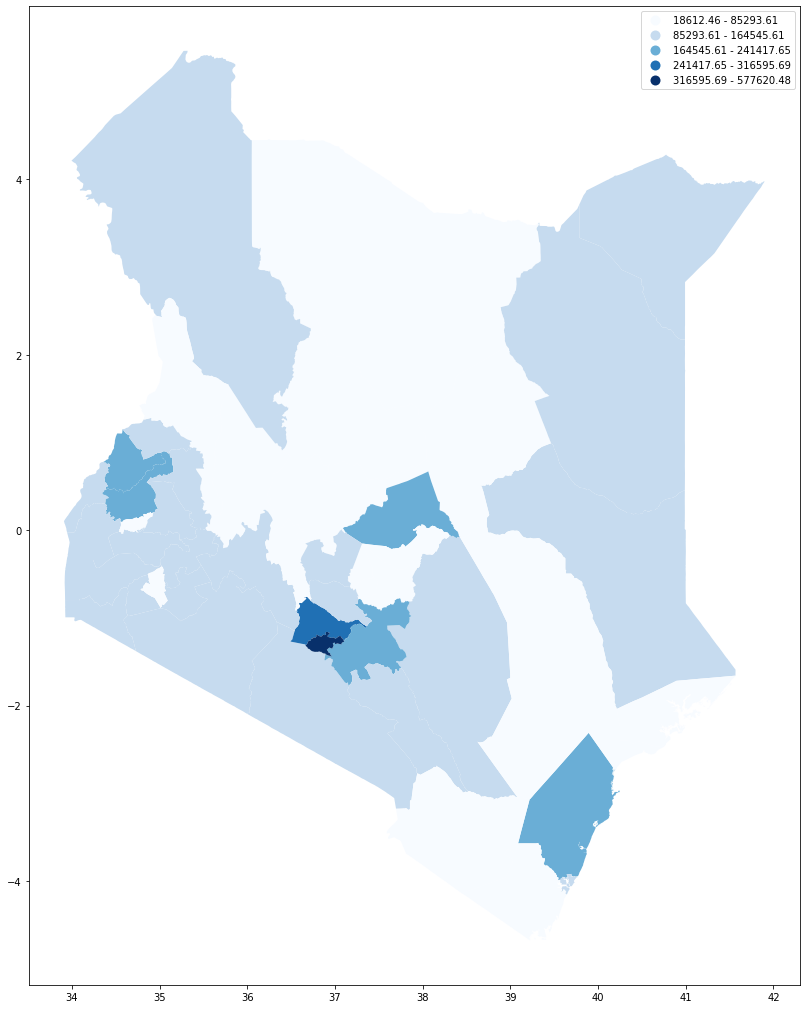

In [25]:
# Create infections map
infections = inf_cfr_ifr_county.plot(column='Infections', cmap =    
                                'Blues', figsize=(30,18),   
                                 scheme='fisherjenks', k=5, legend =  
                                  True)



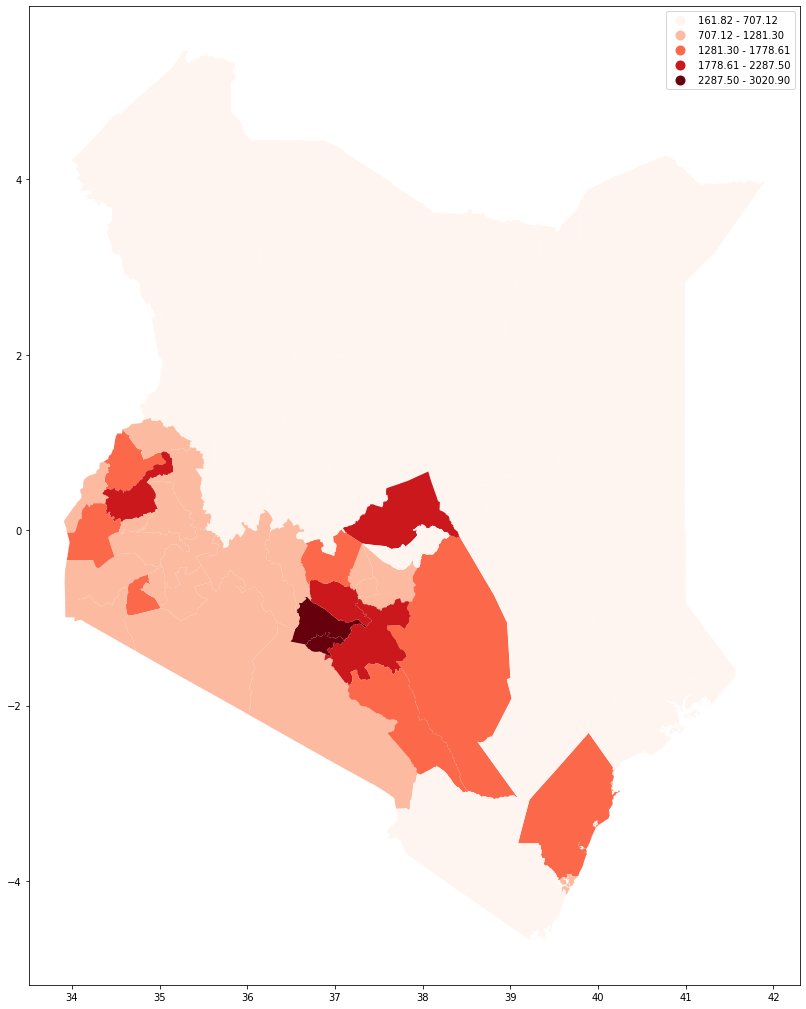

In [26]:
# Create CFR map
cfr_deaths = inf_cfr_ifr_county.plot(column='Deaths CFR', cmap =    
                                'Reds', figsize=(30, 18),   
                                 scheme='fisherjenks', k=5, legend =  
                                  True)

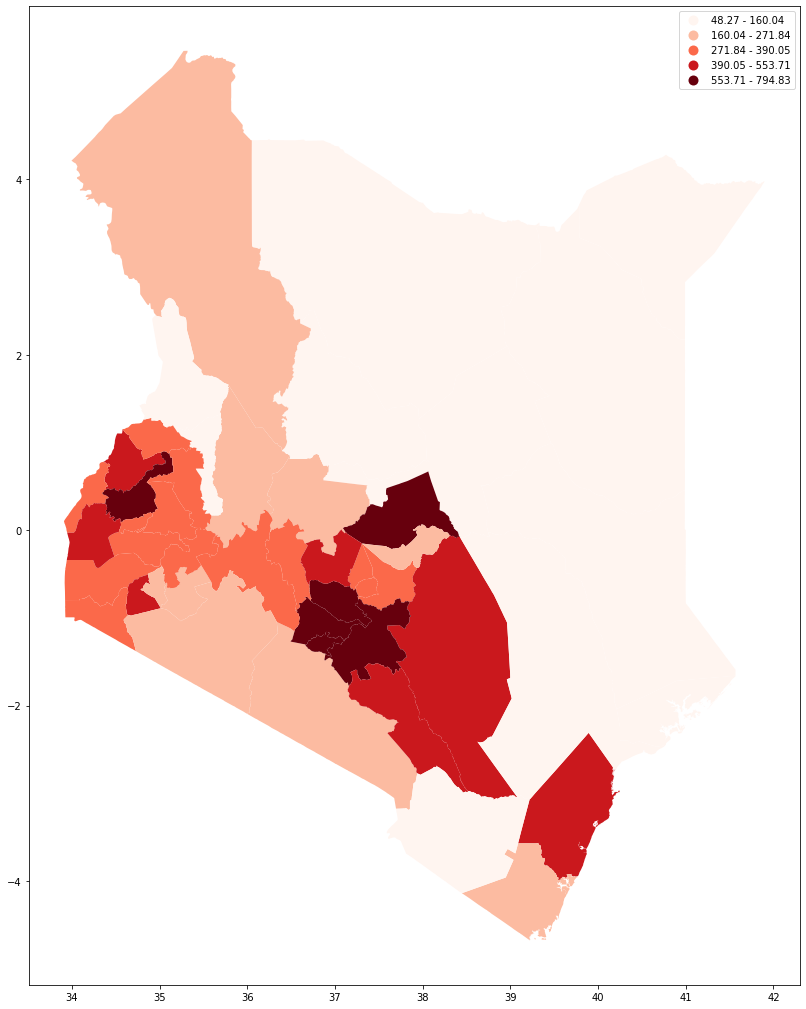

In [27]:
# Create IFR map
ifr_deaths = inf_cfr_ifr_county.plot(column='Deaths IFR', cmap =    
                                'Reds', figsize=(30,18),   
                                 scheme='fisherjenks', k=5, legend =  
                                  True, label = 'IFR Deaths')

You can now copy/share the images!

Quick caveat, this data and method may is best consumed and developed together with epidemiologists in order to effectively utilise and consume.

**DO NOT USE** use this a substitute rather than as a tool for engagement with epidimiologists.